In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import numpy as np

In [19]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcandd0fullp' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2342333492057724;1', 'DF_2342333492057724/O2hfcandd0fullp;1', 'DF_2342333492057724/O2hfcandd0lite;1', 'parentFiles;1']
DF_2342333492057724/O2hfcandd0fullp;1
len(full_df): 3408


In [20]:
print(full_df.columns)

Index(['fPt', 'fEta', 'fPhi', 'fY', 'fFlagMc', 'fFlagMcDecayChanGen',
       'fOriginMcGen'],
      dtype='object')


In [21]:
full_df = full_df[full_df['fFlagMc'] != 0]
print(f"Unique values in fFlagMc after filtering: {sorted(full_df['fFlagMc'].unique())}")
print(f"len(full_df) after filtering: {len(full_df)}")

Unique values in fFlagMc after filtering: [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]
len(full_df) after filtering: 3408


In [22]:
unique_values = sorted(full_df['fFlagMcDecayChanGen'].unique())
print("Unique values in fFlagMcDecayChanGen:", unique_values)

Unique values in fFlagMcDecayChanGen: [0, 1, 2, 3, 4]


In [23]:
# Check if all resonant flags have been activated
particles = {
    'D0': [0, 32],
}

for particle, flag_range in particles.items():
    filtered_df = full_df[
        (abs(full_df['fFlagMc']) >= flag_range[0]) &
        (abs(full_df['fFlagMc']) < flag_range[1])
    ].copy()  # Ensure it's a separate copy

    unique_flags = filtered_df['fFlagMcDecayChanGen'].unique()
    unique_flags_sorted = sorted(unique_flags)  # Sort in increasing order

    print(f"[{particle}] Unique values in fFlagMcDecayChanGen after filtering (sorted): {unique_flags_sorted}")

[D0] Unique values in fFlagMcDecayChanGen after filtering (sorted): [0, 1, 2, 3, 4]


In [24]:
unique_values = full_df['fOriginMcGen'].unique()
print("Number of unique values in fOriginMcGen:", len(unique_values))
print("Unique values in fOriginMcGen:", unique_values)

Number of unique values in fOriginMcGen: 2
Unique values in fOriginMcGen: [1 2]


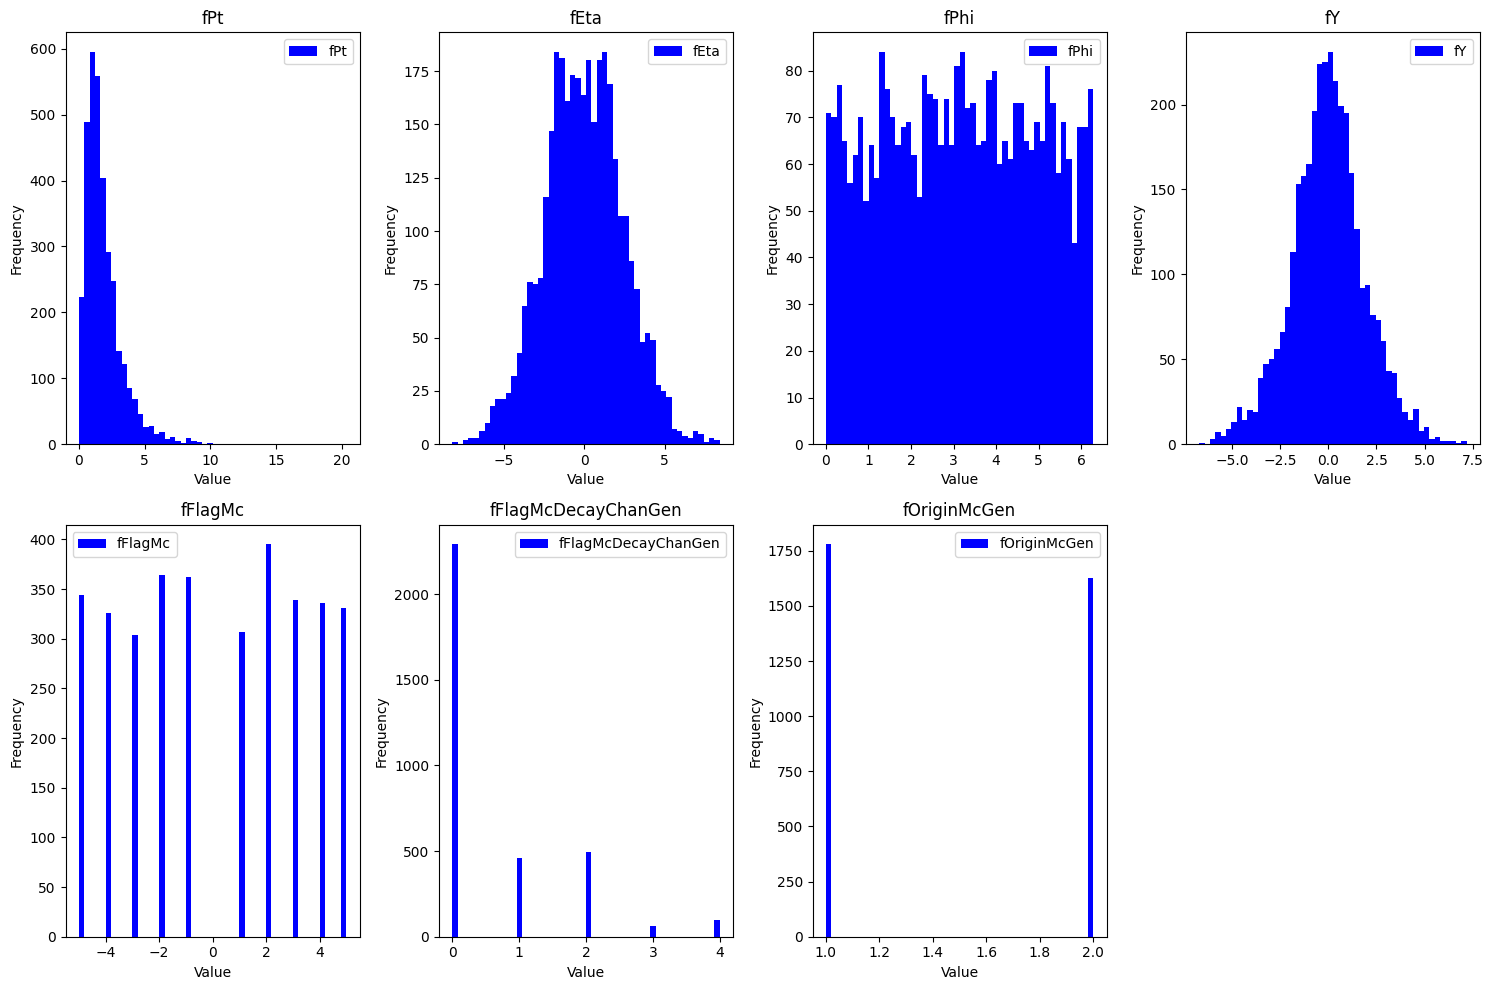

In [25]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(full_df.columns):
    data = full_df[column]
    finite_data = data[np.isfinite(data)]  # Filter out NaN and inf

    if len(finite_data) == 0:
        axes[i].set_visible(False)
        continue

    axes[i].hist(finite_data, bins=50, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend([column])

# Hide any unused axes
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
